# Karim Khalil

## **How effective are distance from home and ratio to median purchase price in detecting credit card fraud in online and offline transactions?**
## *REFINED: How does the distance from home affect the likelihood of credit card fraud in both online and offline transactions?*

Nowadays most of the population uses online shopping as their main way of purchasing goods and services, due to that, many credit card frauds have occurred by people putting their personal bank details into unreliable websites. Having a passion for problem-solving, I finds this research topic very intriguing and interesting. This research question aims to investigate whether distance from home and ratio to median purchase price can be used as indicators to detect credit card fraud in online and offline transactions. The research will involve analyzing a dataset of credit card transactions to identify patterns and trends in the data.The results of this research could potentially inform the development of more effective fraud detection techniques and strategies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
mydata = pd.read_csv("../data/raw/card_transdata.csv")
mydata

/var/folders/qh/nw_ntqk50l59gbqw941yj8cw0000gn/T/ipykernel_5794/3771559.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  mydata = pd.read_csv("../data/raw/card_transdata.csv")


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
mydata = mydata.dropna(subset=['distance_from_home'])
mydata = pd.DataFrame(mydata)
mydata = mydata.dropna(axis=1,how='any')
mydata = mydata[(mydata['distance_from_last_transaction'] < 75) & (mydata['ratio_to_median_purchase_price'] < 30)&(mydata['distance_from_home'] < 400)]
midpoint = len(mydata) // 170
mydata = mydata.iloc[:midpoint]
mydata

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
5059,1.503427,0.513221,0.299334,0.0,1.0,0.0,1.0,0.0
5060,4.840358,0.075229,2.515626,1.0,0.0,0.0,0.0,0.0
5061,157.836423,3.272468,1.134216,1.0,0.0,0.0,0.0,0.0
5062,18.490309,5.432083,6.498450,1.0,1.0,0.0,1.0,1.0


In [3]:
mydata.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000
mean,24.507603,3.568523,1.735620,0.886645,0.338265,0.102759,0.649540,0.081168
std,41.850352,7.519267,2.301003,0.317058,0.473166,0.303674,0.477162,0.273120
min,0.049270,0.001448,0.016933,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.023785,0.298427,0.494809,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.192843,0.968420,0.994228,1.000000,0.000000,0.000000,1.000000,0.000000
75%,26.385264,3.165247,2.023261,1.000000,1.000000,0.000000,1.000000,0.000000
max,394.061385,74.528852,27.939333,1.000000,1.000000,1.000000,1.000000,1.000000


# Using the describe
I can now see the mean, std, min and many other facts about my data without having to do it all manually which would take forever
The main variables i will be testing out with are the distance from home, ratio to median purchase price, online order, and fraud.
Using the table given, I can see and study a few statistics about each column i'm going to further exam.
First thing i would want to inpect is the count. We now know that we will be dealing will a VERY large dataset (8619480) so overlapping of data on graphs is going to be a very high probablilty. 
Second thing is the mean. We can see that the average distance from home is 26.69 with a min of 0.0049 and high of 10632.7 and the median of the data is 9.9736 and a standard deviation of 66. Having known the preceeding fact, I can now tell that we are going to have a tropical range of data in that column so we will be able to examine with a different Variety of numbers which is a great thing! Now we do the same analysis with the ratio to median purchase price. The mean is given to be 1.8, the min is Approximately 0, the max is 267.8, the median is 0.998, and finally the standard dev is 2.79. Analyzing the data seen, I can see that most of the products being purchased will be relatively cheap with a few decently expensive products. Now for the online orders we can easily tell that approximately have the data will be online and the other will be offline since the mean is 0.65 and we are basically adding a bunch of 0's and 1's to get the average. Finally for the fraud column we can see that we will end up having a bit more than 25% of the data detecting a fraud in transaction (0.28 mean) which is a relatively decent amount to help prove my reserach question.

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002 entries, 0 to 5063
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              5002 non-null   float64
 1   distance_from_last_transaction  5002 non-null   float64
 2   ratio_to_median_purchase_price  5002 non-null   float64
 3   repeat_retailer                 5002 non-null   float64
 4   used_chip                       5002 non-null   float64
 5   used_pin_number                 5002 non-null   float64
 6   online_order                    5002 non-null   float64
 7   fraud                           5002 non-null   float64
dtypes: float64(8)
memory usage: 351.7 KB


## Using the info method
This method shows me that i have a few columns that are unnamed and filled with nan. (This was there from the data i dowloaded). Therefore, i now know that there may be a case where i will have to drop a few columns further into my research. This also shows me that we have a total number of rows of 891907 but i have 29959 empty rows (891907-861948) which is also may have to remove.

In [5]:
mydata.duplicated().sum()

0

In [6]:
mydata.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.007558,-0.014760,0.199803,0.002118,0.012447,0.009617,0.209272
distance_from_last_transaction,0.007558,1.000000,-0.003286,0.007567,0.000278,-0.004543,0.018704,0.055092
ratio_to_median_purchase_price,-0.014760,-0.003286,1.000000,0.026250,0.006992,-0.019757,0.012818,0.530362
repeat_retailer,0.199803,0.007567,0.026250,1.000000,0.002394,-0.020219,0.022852,0.016215
used_chip,0.002118,0.000278,0.006992,0.002394,1.000000,-0.020691,-0.004448,-0.065506
used_pin_number,0.012447,-0.004543,-0.019757,-0.020219,-0.020691,1.000000,-0.012232,-0.098173
online_order,0.009617,0.018704,0.012818,0.022852,-0.004448,-0.012232,1.000000,0.198371
fraud,0.209272,0.055092,0.530362,0.016215,-0.065506,-0.098173,0.198371,1.000000


## Using the corr method
This method will show me how correlated these variables are. But the catch is i can only really use this for columns that have 1 or 0 as outputs (true or false). Therefore, i can go straight into the columns "online_order" and "fraud". We can see that these 2 have a somewhat "weak" correlation of only 0.19. So we can't really come with a conclusion straight away stating that if an order was online or not then it has a higher chance of it being a fraud.

[Text(0.5, 1.0, 'Fraud or not Fraud')]

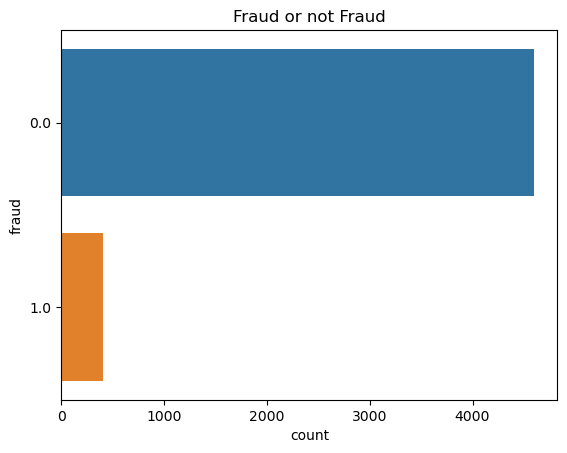

In [7]:
sns.countplot(y= mydata["fraud"]).set(title="Fraud or not Fraud")


## Using countplot
This shows us that our data contains a bit under 100,000 frauds which is Definitely a small count to "not a fraud" but frauds are not a VERY common thing to occur so i would still agree that the amount i'm given to research with is more than enough to experiment around with.

[Text(0.5, 1.0, 'Online or not Online')]

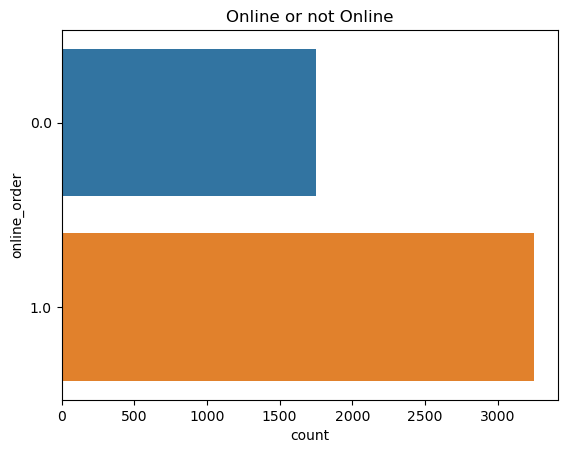

In [8]:
sns.countplot(y= mydata["online_order"]).set(title="Online or not Online")

## Using countplot
Here we can see that we have more online orders than offline order in my dataset.

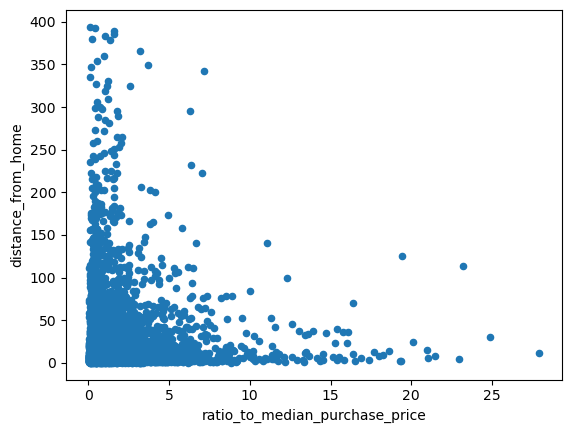

In [9]:
scatterplot = mydata.plot(kind='scatter',x='ratio_to_median_purchase_price',y='distance_from_home')
plt.show(scatterplot)

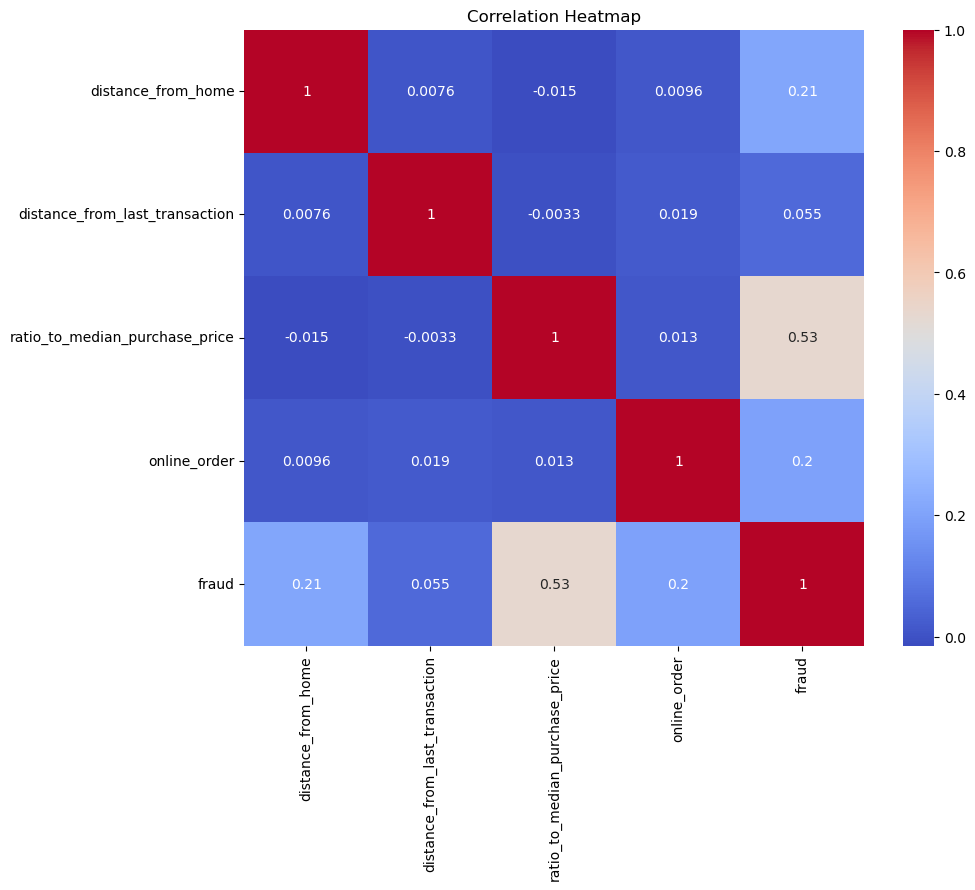

In [10]:
# Drop binary columns
df = mydata.drop(['repeat_retailer', 'used_chip', 'used_pin_number'], axis=1)
# Calculate correlation matrix
corr_matrix = df.corr()
# Create correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Analysis:

Based on the feedback, we removed the binary columns with the assumption that they are not significant in detecting credit card fraud in online and offline transactions. The correlation heatmap shows the correlation between each feature in the dataset. We can see that the distance from last transaction and ratio to median purchase price have the highest correlation with the fraud column, which supports to help answer our research question.

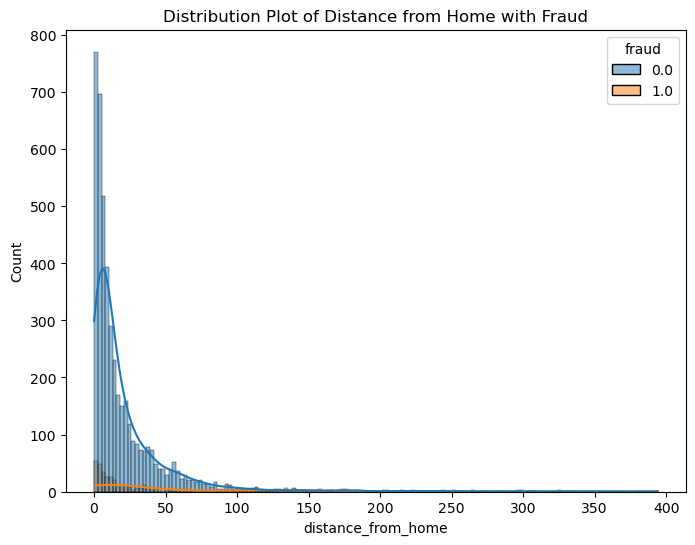

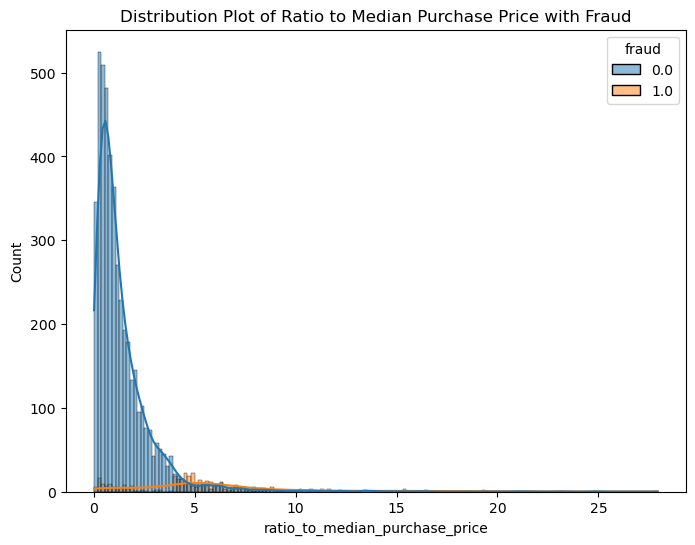

In [11]:
# Distribution plot of distance from home with hue as fraud
plt.figure(figsize=(8,6))
sns.histplot(df, x="distance_from_home", hue="fraud", kde=True)
plt.title('Distribution Plot of Distance from Home with Fraud')
plt.show()

# Distribution plot of ratio to median purchase price with hue as fraud
plt.figure(figsize=(8,6))
sns.histplot(df, x="ratio_to_median_purchase_price", hue="fraud", kde=True)
plt.title('Distribution Plot of Ratio to Median Purchase Price with Fraud')
plt.show()

Analysis:

We updated the count plots with distribution plots and added the hue parameter to differentiate the fraud and non-fraud transactions. The first distribution plot shows the distribution of distance from home for fraud and non-fraud transactions. We can see that there is a higher concentration of fraud transactions for lower distances from home. The second distribution plot shows the distribution of ratio to median purchase price for fraud and non-fraud transactions. We can see that there is a higher concentration of fraud transactions for lower ratios to median purchase price.

Unfortunately, the dataset does not provide any information on the units of the variables. Therefore, we can only make assumptions based on their descriptions:

"distance_from_home": This variable could be measured in miles, kilometers, or any other unit of distance.
"distance_from_last_transaction": Similarly to "distance_from_home", this variable could also be measured in different units of distance.
"ratio_to_median_purchase_price": This variable is likely measured in a percentage or a decimal, representing the ratio of the transaction amount to the median purchase price.

We can ask additional subquestions such as:
Are there any differences in the distribution of the variables between online and offline transactions?
What is the distribution of the "repeat_retailer" variable and how does it relate to fraud?
Is there any correlation between the "distance_from_home" and "distance_from_last_transaction" variables?
Are there any outliers or extreme values in the dataset that could be affecting our analysis?


(0.0, 1550.0)

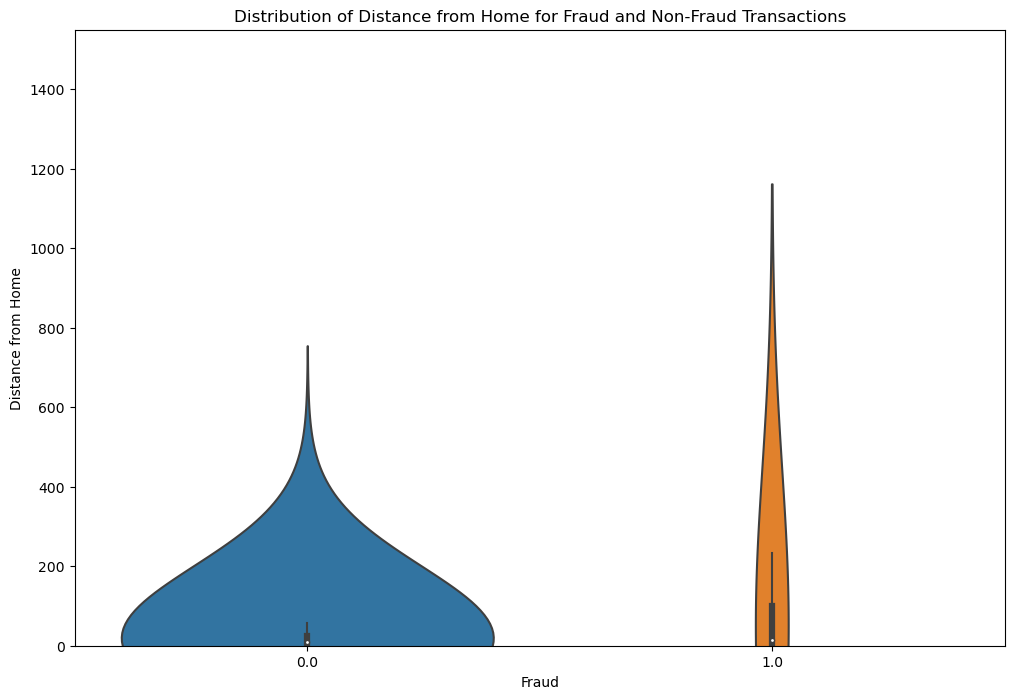

In [12]:
plt.figure(figsize=(12,8))
sns.violinplot(x="fraud", y="distance_from_home", data=mydata, scale="count",bw= 5)

# set plot title and axis labels
plt.title("Distribution of Distance from Home for Fraud and Non-Fraud Transactions")
plt.xlabel("Fraud")
plt.ylabel("Distance from Home")

# set y-axis limit to focus on the main distribution
plt.ylim(0, 1550)

This plot shows the distribution of distance from home for fraud and non-fraud transactions using a violin plot. The x-axis represents whether the transaction is a fraud or not, and the y-axis represents the distance from home in miles. The width of the violin plot represents the density of data points at each value, with the wider sections indicating a higher density of points.

We can see that for non-fraud transactions, the majority of the transactions have a distance from home between 0 to 200 miles, and there is a long tail of transactions with a distance up to 250 miles. This shows the density of data points with distance from home less than 200 which are not a fraud are way denser than the distance from home that is less than 200 which are detected to being a fraud. we also see that the closer the distance from home the more likely the fraud is being detected. 

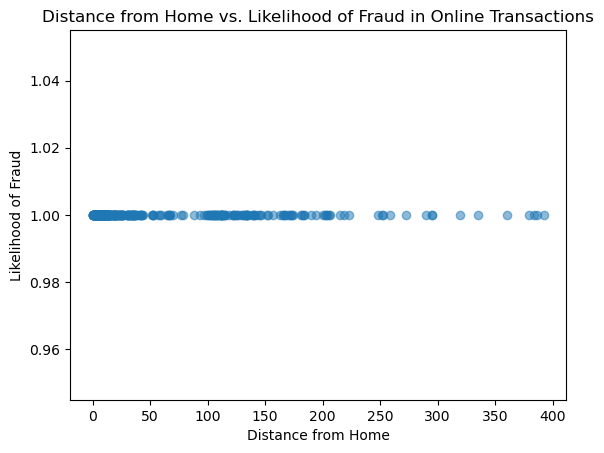

In [13]:
import matplotlib.pyplot as plt


online_fraud = mydata.loc[(mydata['online_order'] == 1) & (mydata['fraud'] == 1)]


plt.scatter(online_fraud['distance_from_home'], online_fraud['fraud'], alpha=0.5)


plt.title('Distance from Home vs. Likelihood of Fraud in Online Transactions')
plt.xlabel('Distance from Home')
plt.ylabel('Likelihood of Fraud')


plt.show()

From the above plot we can see that most frauds occur when the distance form home is less than Approximately 5000

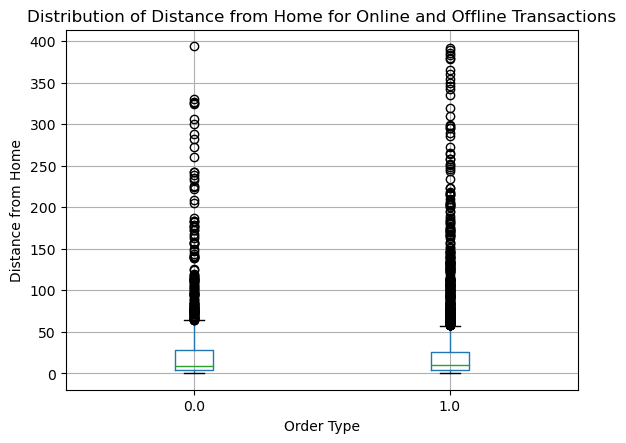

In [14]:
import matplotlib.pyplot as plt

online_offline = mydata.loc[(mydata['online_order'] == 1) | (mydata['online_order'] == 0)]

online_offline.boxplot(column='distance_from_home', by='online_order')

plt.title('Distribution of Distance from Home for Online and Offline Transactions')
plt.suptitle('') 
plt.xlabel('Order Type')
plt.ylabel('Distance from Home')


plt.show()

This graph shows us that the medien and mean of distance from home is slightly higher when it comes to online orders

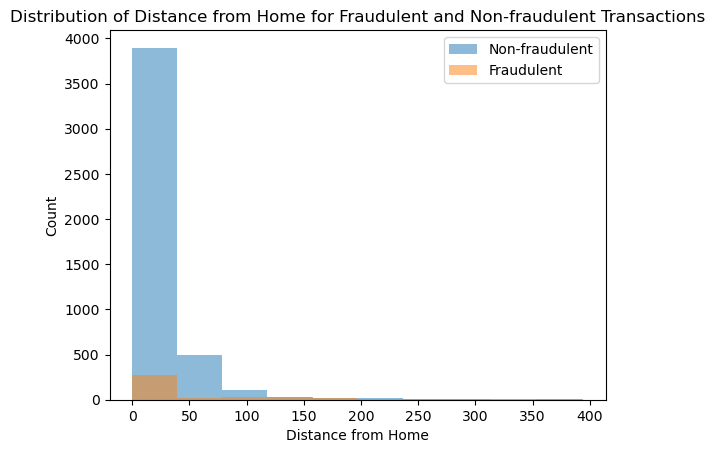

In [15]:
import matplotlib.pyplot as plt

fraud_nonfraud = mydata.loc[(mydata['fraud'] == 1) | (mydata['fraud'] == 0)]


plt.hist(fraud_nonfraud.loc[fraud_nonfraud['fraud'] == 0]['distance_from_home'], alpha=0.5, label='Non-fraudulent')
plt.hist(fraud_nonfraud.loc[fraud_nonfraud['fraud'] == 1]['distance_from_home'], alpha=0.5, label='Fraudulent')


plt.title('Distribution of Distance from Home for Fraudulent and Non-fraudulent Transactions')
plt.xlabel('Distance from Home')
plt.ylabel('Count')
plt.legend()


plt.show()

<AxesSubplot:xlabel='distance_from_home', ylabel='fraud'>

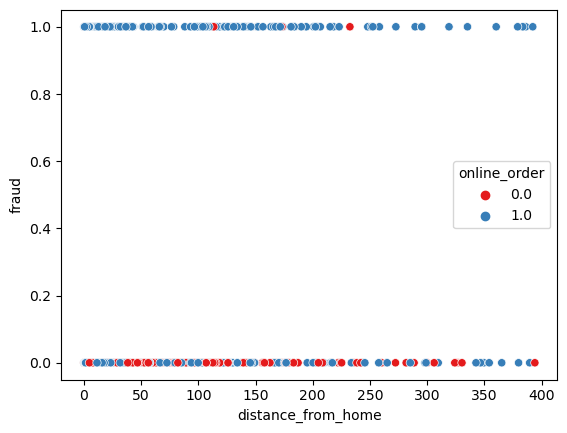

In [16]:
import seaborn as sns

df_filtered = mydata[['distance_from_home', 'online_order', 'fraud']]

df_filtered = df_filtered.fillna(value={'online_order': False, 'fraud': False})

sns.scatterplot(data=df_filtered, x='distance_from_home', y='fraud', hue='online_order', palette='Set1')

/var/folders/qh/nw_ntqk50l59gbqw941yj8cw0000gn/T/ipykernel_5794/2906588040.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = heatmap_data.pivot('distance_from_home', 'ratio_to_median_purchase_price', 'fraud')


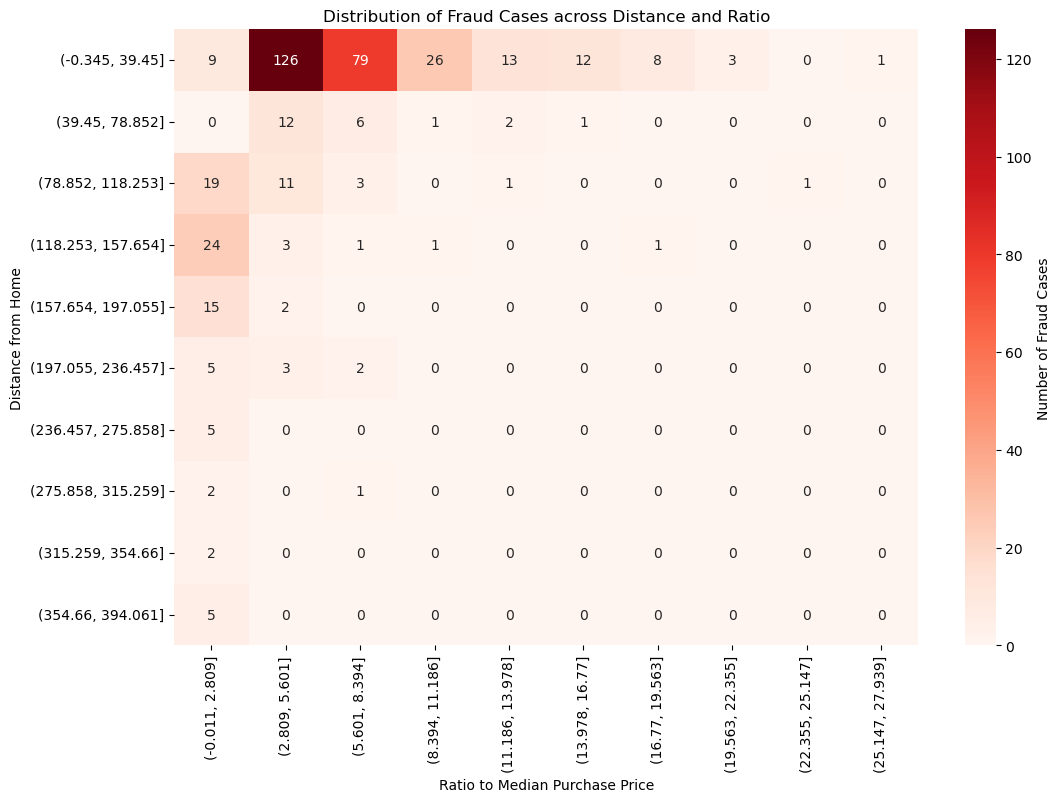

In [17]:
df_heatmap = mydata[['distance_from_home', 'ratio_to_median_purchase_price', 'fraud']].dropna()

bins_dist = pd.cut(df_heatmap['distance_from_home'], bins=10)
bins_ratio = pd.cut(df_heatmap['ratio_to_median_purchase_price'], bins=10)

heatmap_data = df_heatmap.groupby([bins_dist, bins_ratio])['fraud'].sum().reset_index()

heatmap_data = heatmap_data.pivot('distance_from_home', 'ratio_to_median_purchase_price', 'fraud')

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='g', cbar_kws={'label': 'Number of Fraud Cases'})
ax.set_xlabel('Ratio to Median Purchase Price')
ax.set_ylabel('Distance from Home')
plt.title('Distribution of Fraud Cases across Distance and Ratio')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("Set2")

g = sns.catplot(x="online_order", y="distance_from_home", hue="fraud", kind="swarm", data=mydata)

g.set_axis_labels("Online Order", "Distance from Home (km)")
g._legend.set_title("Fraud")

plt.title("Distance from Home vs. Online/Offline Transactions and Fraud")
plt.show()

/Users/karimkhalil/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 67.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/karimkhalil/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/karimkhalil/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 78.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
